In [12]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split


In [29]:
# Read the CSV file from the Resources folder and create a Pandas DataFrame
Greece_data_df = pd.read_csv("Resources/travel_tourism_dataset.csv")


In [30]:
# Review the DataFrame showing the first five rows
Greece_data_df.head()

,Trip #no.,Duration,Cost of Travel(Entire Trip),Mode of Travel,Stay,First Name,Last Name,Date of Birth,Address,Age,Sex,Nationality,Date of Travel
0,55,1,20111,Flight,Hotel,Cristina,Fuentes,1914-06-14,"5143 Pope Camp Apt. 028\nLake Emily, UT 71371",74,Non-Binary,Lao People's Democratic Republic,2022-09-13
1,288,5,29681,Car,Hotel,Patricia,Young,1923-09-25,716 Dominguez Row Suite 775\nSouth Tiffanyboro...,19,Female,Gabon,2021-09-04
2,291,7,24950,Flight,Airbnb,Christina,Kirby,1935-01-02,"PSC 4600, Box 1237\nAPO AE 32510",36,Female,Syrian Arab Republic,2021-01-25
3,131,19,18676,Roadtrip,Airbnb,Michael,Hudson,1982-04-21,"7013 Bryant Club Suite 695\nSouth Tina, WI 26739",38,Non-Binary,Afghanistan,2022-01-28
4,281,28,18899,Flight,Airbnb,Francisco,Hensley,1913-06-29,"074 Scott Brook Suite 700\nLukeville, VA 46541",38,Non-Binary,Uruguay,2021-10-21


In [31]:
# Show how many rows and columns the DataFrame contains
Greece_data_df.shape

(3000, 13)

In [32]:
# Show how what mode of transportation is used the most to least
unique_modes_of_travel = Greece_data_df['Mode of Travel'].value_counts()
print(unique_modes_of_travel)

Car         551
Bus         516
Cruise      501
Train       498
Roadtrip    473
Flight      461
Name: Mode of Travel, dtype: int64


In [33]:
# Show the dates of travel from least traveled date to most traveled date
dates = Greece_data_df['Date of Travel'].value_counts().sort_values(ascending=True)
print(dates)



2021-06-19    1
2022-03-20    1
2022-02-15    1
2020-07-12    1
2021-03-31    1
             ..
2022-09-07    8
2020-01-29    8
2020-09-20    8
2021-02-22    8
2023-07-07    9
Name: Date of Travel, Length: 1194, dtype: int64


In [35]:
#show the number of people that traveled by date
grouped_date = Greece_data_df.groupby('Date of Travel')
date_counts = grouped_date.size()
print(date_counts)

Date of Travel
2020-01-02    1
2020-01-03    4
2020-01-04    3
2020-01-05    3
2020-01-06    2
             ..
2023-08-22    4
2023-08-24    3
2023-08-25    1
2023-08-26    1
2023-08-27    1
Length: 1194, dtype: int64


In [38]:
# Convert 'Date of Travel' column in datetime format
Greece_data_df['Date of Travel'] = pd.to_datetime(Greece_data_df['Date of Travel'])

# Create a new column 'Month' that extracts the month from 'Date of Travel'
Greece_data_df['Month'] = Greece_data_df['Date of Travel'].dt.strftime('%Y-%m')

# group the data by month
Greece_counts = Greece_data_df['Month'].value_counts().sort_index()


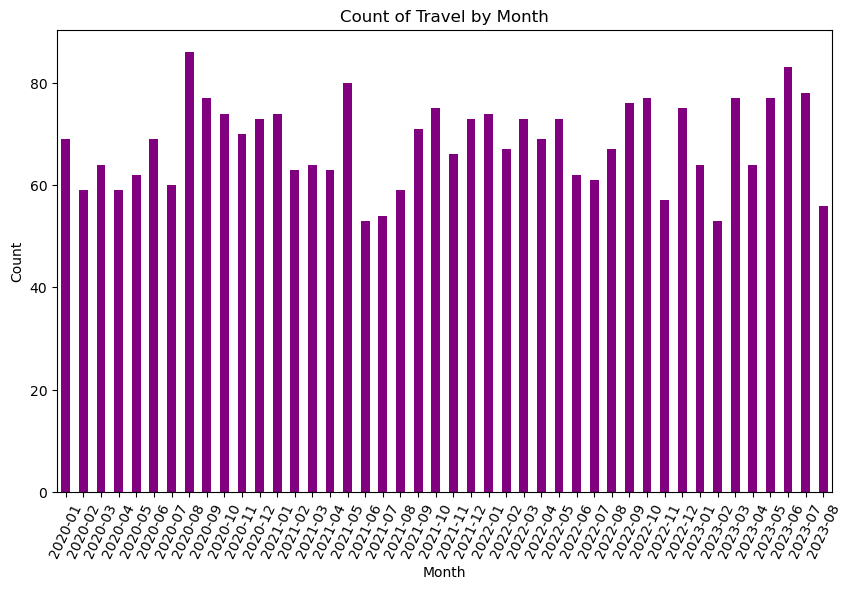

In [43]:
# Create a plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='purple')
plt.title('Count of Travel by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.show()